- Mettre en œuvre des techniques de réduction de dimension
- Représenter graphiquement des données à grandes dimensions
- Prétraiter des données image pour obtenir un jeu de données exploitable
- Prétraiter des données texte pour obtenir un jeu de données exploitable

ref : https://medium.com/greyatom/an-introduction-to-bag-of-words-in-nlp-ac967d43b428

Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 

- deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf
- une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText)
- une approche de type word/sentence embedding avec BERT
- une approche de type word/sentence embedding avec USE (Universal Sentence Encoder)

 

Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :

- un algorithme de type SIFT / ORB / SURF
- un algorithme de type CNN Transfer Learning

# EDA

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")

In [3]:
df.dtypes.value_counts()

object     12
float64     2
bool        1
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [5]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [6]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


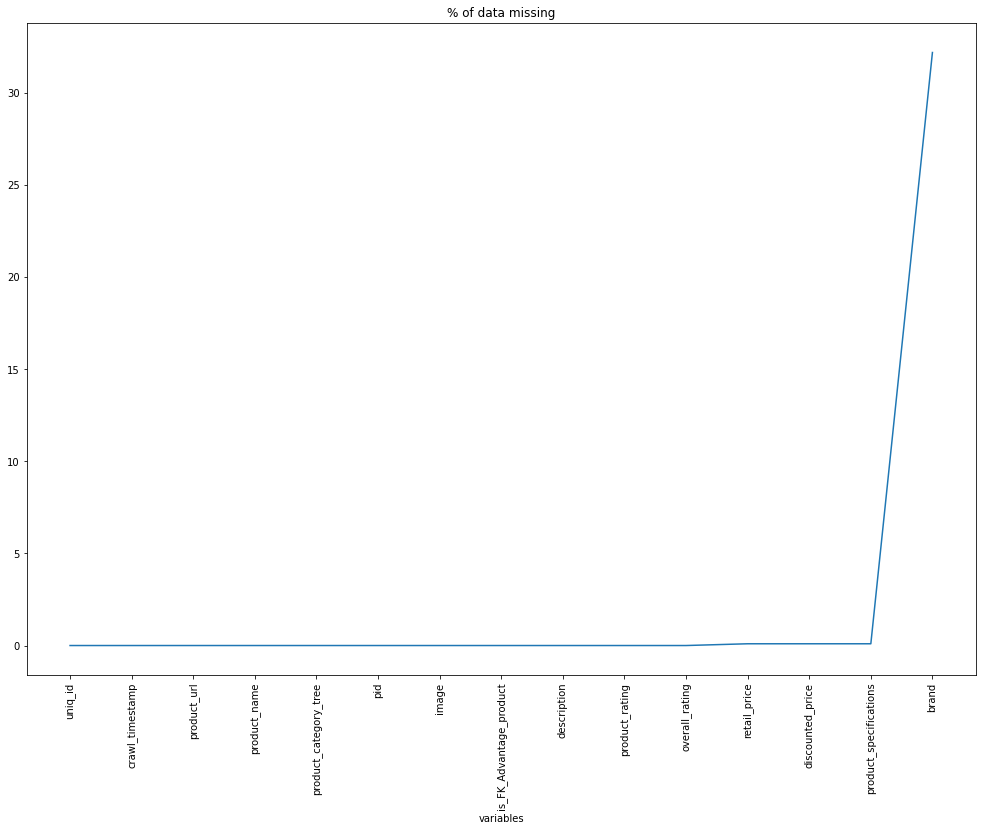

In [7]:
df_missing = df.isna().sum().sort_values()/len(df)*100

fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
degrees = 90
plt.xticks(rotation=degrees)
plt.title('% of data missing')
plt.xlabel('variables')
plt.plot(df_missing)

In [8]:
df.isna().mean().sort_values()*100

uniq_id                     0.000000
crawl_timestamp             0.000000
product_url                 0.000000
product_name                0.000000
product_category_tree       0.000000
pid                         0.000000
image                       0.000000
is_FK_Advantage_product     0.000000
description                 0.000000
product_rating              0.000000
overall_rating              0.000000
retail_price                0.095238
discounted_price            0.095238
product_specifications      0.095238
brand                      32.190476
dtype: float64

<AxesSubplot:>

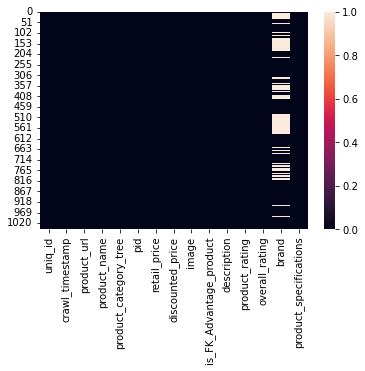

In [9]:
sns.heatmap(df.isna())

In [10]:
for column in df:
    print(df.nunique(axis=0).sum()/len(df)/len(df.columns))

0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048
0.5967619047619048


In [11]:
for column in df:
    print(df.nunique(axis=1).sum()/len(df)/len(df.columns))

0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556
0.8995555555555556


In [12]:
df.isna().sum().sort_values()/len(df)*100

uniq_id                     0.000000
crawl_timestamp             0.000000
product_url                 0.000000
product_name                0.000000
product_category_tree       0.000000
pid                         0.000000
image                       0.000000
is_FK_Advantage_product     0.000000
description                 0.000000
product_rating              0.000000
overall_rating              0.000000
retail_price                0.095238
discounted_price            0.095238
product_specifications      0.095238
brand                      32.190476
dtype: float64

In [13]:
for column in df:
    print(df.isna().sum().sum()/len(df)/len(df.columns))

0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365
0.02165079365079365


In [14]:
for column in df:
    print(df.duplicated().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [15]:
for column in df:
    print(df.index.duplicated().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [16]:
df["brand"].fillna(" ", inplace=True)

In [17]:
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [18]:
df.shape

(1050, 15)

In [19]:
pd.set_option('max_colwidth', 10000)

In [20]:
df["product_name"]

0              Elegance Polyester Multicolor Abstract Eyelet Door Curtain
1                                              Sathiyas Cotton Bath Towel
2                                     Eurospa Cotton Terry Face Towel Set
3         SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet
4                   Jaipur Print Cotton Floral King sized Double Bedsheet
                                      ...                                
1045                       Oren Empower Extra Large Self Adhesive Sticker
1046                               Wallmantra Large Vinyl Sticker Sticker
1047    Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker
1048                              Wallmantra Medium Vinyl Sticker Sticker
1049                                         Uberlyfe Large Vinyl Sticker
Name: product_name, Length: 1050, dtype: object

In [21]:
df["brand"]

0                    Elegance
1                    Sathiyas
2                     Eurospa
3       SANTOSH ROYAL FASHION
4                Jaipur Print
                ...          
1045             Oren Empower
1046               Wallmantra
1047                 Uberlyfe
1048               Wallmantra
1049                 Uberlyfe
Name: brand, Length: 1050, dtype: object

In [22]:
#pour faire une description unique
df['description'] = df["product_name"] + " " + df["brand"] + " " + df["description"]
print(df['description'])

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [23]:
df['description']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [24]:
df['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [25]:
description_category = df[['product_category_tree','description']]
description_category['product_category_tree'] = description_category['product_category_tree'].apply(lambda x: x.split(' >> '))
print(description_category.shape)
description_category.head()

(1050, 2)


C:\Users\tropical noise\AppData\Local\Temp\ipykernel_13180\1201625583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description_category['product_category_tree'] = description_category['product_category_tree'].apply(lambda x: x.split(' >> '))


,product_category_tree,description
0,"[[""Home Furnishing, Curtains & Accessories, Curtains, Elegance Polyester Multicolor Abstract Eyelet Do...""]]","Elegance Polyester Multicolor Abstract Eyelet Door Curtain Elegance Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester"
1,"[[""Baby Care, Baby Bath & Skin, Baby Bath Towels, Sathiyas Baby Bath Towels, Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]]","Sathiyas Cotton Bath Towel Sathiyas Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel"
2,"[[""Baby Care, Baby Bath & Skin, Baby Bath Towels, Eurospa Baby Bath Towels, Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]]","Eurospa Cotton Terry Face Towel Set Eurospa Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM 360 Type Face Towel Set Model Name SHUVAM20PCFTSETASSORTED Ideal For Boys, Girls, Men, Women Model ID SHUVAM20PCFTSETASSORTED Size small Color Assorted Dimensions Weight 350 g Length 9 inch Width 9 inch In the Box Number of Contents in Sales Package 20 Sales Package 20 PIECE FACE TOWEL SET"
3,"[[""Home Furnishing, Bed Linen, Bedsheets, SANTOSH ROYAL FASHION Bedsheets, SANTOSH ROYAL FASHION Cotton Printed King sized ...""]]","SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet SANTOSH ROYAL FASHION Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Be

In [26]:
description_category['product_category_tree'][0]

['["Home Furnishing',
 'Curtains & Accessories',
 'Curtains',
 'Elegance Polyester Multicolor Abstract Eyelet Do..."]']

In [27]:
description_category['product_category_tree'].to_list()

[['["Home Furnishing',
  'Curtains & Accessories',
  'Curtains',
  'Elegance Polyester Multicolor Abstract Eyelet Do..."]'],
 ['["Baby Care',
  'Baby Bath & Skin',
  'Baby Bath Towels',
  'Sathiyas Baby Bath Towels',
  'Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]'],
 ['["Baby Care',
  'Baby Bath & Skin',
  'Baby Bath Towels',
  'Eurospa Baby Bath Towels',
  'Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]'],
 ['["Home Furnishing',
  'Bed Linen',
  'Bedsheets',
  'SANTOSH ROYAL FASHION Bedsheets',
  'SANTOSH ROYAL FASHION Cotton Printed King sized ..."]'],
 ['["Home Furnishing',
  'Bed Linen',
  'Bedsheets',
  'Jaipur Print Bedsheets',
  'Jaipur Print Cotton Floral King sized Double Bed..."]'],
 ['["Watches', 'Wrist Watches', 'Maserati Time Wrist Watches"]'],
 ['["Watches', 'Wrist Watches', 'Camerii Wrist Watches"]'],
 ['["Watches', 'Wrist Watches', 'T STAR Wrist Watches"]'],
 ['["Watches', 'Wrist Watches', 'Alfajr Wrist Watches"]'],
 ['["Watches', 'Wrist Watches', 'TAG 

In [28]:
import re
# Extraction des colonnes pertinentes
columns = ['category_1', 'category_2', 'category_3']
cat = description_category['product_category_tree'].to_list()
cat = pd.DataFrame(cat)
cat = cat.loc[:,0:2]
cat.columns = columns

cat["category_1"] = [re.sub(r'[\[\"\]]', '',w.strip()) for w in cat["category_1"]]
cat["category_2"] = [re.sub(r'[\[\"\]]', '',w.strip()) for w in cat["category_2"]]
cat["category_2"] = [re.sub(r'[\[\"\]]', '',str(w).strip()) for w in cat["category_2"]]

print(cat.shape)
cat.head(5)

(1050, 3)


,category_1,category_2,category_3
0,Home Furnishing,Curtains & Accessories,Curtains
1,Baby Care,Baby Bath & Skin,Baby Bath Towels
2,Baby Care,Baby Bath & Skin,Baby Bath Towels
3,Home Furnishing,Bed Linen,Bedsheets
4,Home Furnishing,Bed Linen,Bedsheets


In [29]:
for col in cat.columns:
    print(cat[col].nunique())

7
62
246


In [30]:
cat = cat.drop(columns = ['category_2'])
cat = cat.drop(columns = ['category_3'])
data = (cat.join(description_category['description']).join(df['image']))
print(data.shape)
data.head(5)

(1050, 3)


,category_1,description,image
0,Home Furnishing,"Elegance Polyester Multicolor Abstract Eyelet Door Curtain Elegance Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,"Sathiyas Cotton Bath Towel Sathiyas Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel",7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,"Eurospa Cotton Terry Face Towel Set Eurospa Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM 360 Type Face Towel Set Model Name SHUVAM20PCFTSETASSORTED Ideal For Boys, Girls, Men, Women Model ID SHUVAM20PCFTSETASSORTED Size small Color Assorted Dimensions Weight 350 g Length 9 inch Width 9 inch In the Box Number of Contents in Sales Package 20 Sales Package 20 PIECE FACE TOWEL SET",64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,"SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet SANTOSH ROYAL FASHION Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washable Yes Type Flat Material Cotton Model Name Gold Design Royal Cotton Printed Wedding & Gifted Double Bedsheet With 2 Pillow cover Model 

<AxesSubplot:title={'center':'Nombre de produits dans chaque catégorie 1'}>

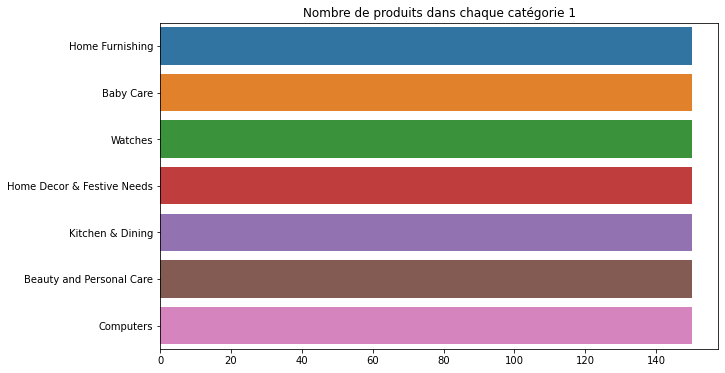

In [31]:
categories_1 = data["category_1"].value_counts()
plt.figure(figsize=(10,6))
plt.title('Nombre de produits dans chaque catégorie 1')
sns.barplot(x = categories_1.values,
           y = categories_1.index)

([<matplotlib.patches.Wedge at 0x18b0a2e19a0>,
 [Text(0.9910657451172095, 0.47727213291294374, 'Home Furnishing'),
  Text(0.24477296280441296, 1.0724207181325571, 'Baby Care'),
  Text(-0.68583886831644, 0.8600145619153347, 'Watches'),
  Text(-1.0999999999999892, -1.5448414893833034e-07, 'Home Decor & Festive Needs'),
  Text(-0.6858386267552901, -0.8600147545539077, 'Kitchen & Dining'),
  Text(0.24477326402622548, -1.0724206493806185, 'Beauty and Personal Care'),
  Text(0.9910658791734962, -0.47727185454211024, 'Computers')],
 [Text(0.5405813155184778, 0.2603302543161511, '14%'),
  Text(0.13351252516604342, 0.5849567553450311, '14%'),
  Text(-0.3740939281726036, 0.46909885195381884, '14%'),
  Text(-0.5999999999999941, -8.426408123908927e-08, '14%'),
  Text(-0.3740937964119763, -0.4690989570294042, '14%'),
  Text(0.13351268946885025, -0.5849567178439737, '14%'),
  Text(0.5405813886400888, -0.26033010247751465, '14%')])

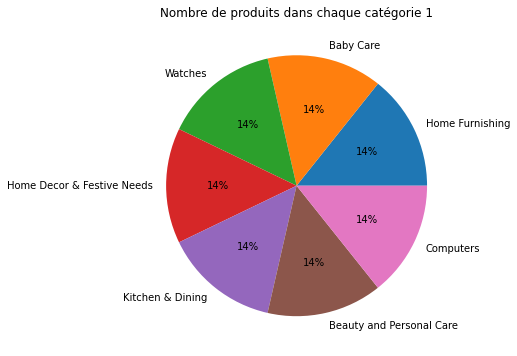

In [32]:
categories_1 = data["category_1"].value_counts()
plt.figure(figsize=(10,6))
plt.title('Nombre de produits dans chaque catégorie 1')
plt.pie(categories_1, labels=list(categories_1.index), autopct='%.0f%%')

<AxesSubplot:title={'center':'Distribution des longueurs des descriptions produit'}, xlabel='description'>

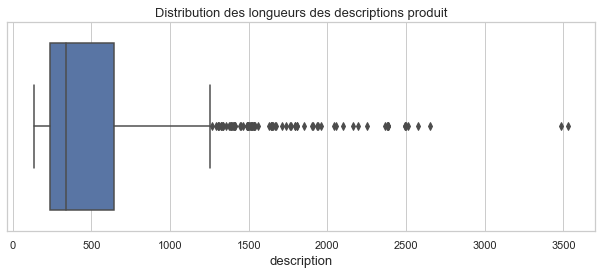

In [33]:
tmp = data.description.str.len()
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})
plt.figure(figsize=(9, 4))
plt.ylabel('')
plt.xlabel('Nombre de caractères')
plt.title("Distribution des longueurs des descriptions produit", fontsize=13)
plt.tight_layout(h_pad=3)
sns.boxplot(tmp)

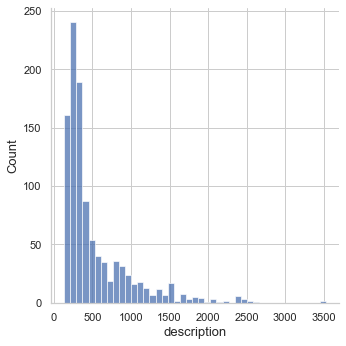

In [34]:
sns.displot(tmp)

In [35]:
# Phrases test à traiter
test = data['description']
print(test)
len(test)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

1050

In [36]:
data.description.apply(lambda i : len(i))

0       1488
1        480
2       1302
3        944
4       1264
        ... 
1045    2492
1046    1710
1047     337
1048     261
1049     225
Name: description, Length: 1050, dtype: int64

In [37]:
#data['description']=data['description'].str.lower()

In [38]:
#data['description'] = data['description'].apply(lambda x: x.replace('eurospa',''))
#data['description'] = data['description'].apply(lambda x: x.replace('santosh',''))
#data['description'] = data['description'].apply(lambda x: x.replace('perfact',''))
#data['description'] = data['description'].apply(lambda x: x.replace('mediam',''))
#data['description'] = data['description'].apply(lambda x: x.replace('sathiyas',''))
#data['description'] = data['description'].apply(lambda x: x.replace('apparance',''))
#data['description'] = data['description'].apply(lambda x: x.replace('goldbedi',''))
#data['description'] = data['description'].apply(lambda x: x.replace('waranty',''))
#data['description'] = data['description'].apply(lambda x: x.replace('onle',''))

# Text processing

In [39]:
import nltk

In [40]:
#test = re.sub(r'\d+', '', test)

In [41]:
data['description'] = data['description'].replace(to_replace=r'\d+', value='', regex=True)

In [42]:
data['description']
len(data['description'][0])

1466

In [43]:
data

,category_1,description,image
0,Home Furnishing,"Elegance Polyester Multicolor Abstract Eyelet Door Curtain Elegance Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain ( cm in Height, Pack of ) Price: Rs. This curtain enhances the look of the interiors.This curtain is made from % high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain ( cm in Height, Pack of ) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of Model ID Duster Color Multicolor Dimensions Length cm In the Box Number of Contents in Sales Package Pack of Sales Package Curtains Body & Design Material Polyester",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,"Sathiyas Cotton Bath Towel Sathiyas Specifications of Sathiyas Cotton Bath Towel ( Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl Color Red, Yellow, Blue Size Mediam Dimensions Length inch Width inch In the Box Number of Contents in Sales Package Sales Package Bath Towel",7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,"Eurospa Cotton Terry Face Towel Set Eurospa Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: inch GSM: ,Eurospa Cotton Terry Face Towel Set ( PIECE FACE TOWEL SET, Assorted) Price: Rs. Eurospa brings to you an exclusively designed, % soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is % cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - cms X cms.,Specifications of Eurospa Cotton Terry Face Towel Set ( PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM Type Face Towel Set Model Name SHUVAMPCFTSETASSORTED Ideal For Boys, Girls, Men, Women Model ID SHUVAMPCFTSETASSORTED Size small Color Assorted Dimensions Weight g Length inch Width inch In the Box Number of Contents in Sales Package Sales Package PIECE FACE TOWEL SET",64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,"SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet SANTOSH ROYAL FASHION Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet ( Bedsheet, Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washable Yes Type Flat Material Cotton Model Name Gold Design Royal Cotton Printed Wedding & Gifted Double Bedsheet With Pillow cover Model ID goldbedi- Color Multicolor Size King Fabric Care Machine Wash, Do Not Bleach Dimensions Flat Shee

In [44]:
# retrait de la ponctuation, mise en minuscule, retrait des caractères spéciaux
# Tokenize a text into tokens 

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')

#tokens = tokenizer.tokenize(test)
data['description'] = data['description'].map(tokenizer.tokenize)
#tokens

In [45]:
data

,category_1,description,image
0,Home Furnishing,"[Elegance, Polyester, Multicolor, Abstract, Eyelet, Door, Curtain, Elegance, Key, Features, of, Elegance, Polyester, Multicolor, Abstract, Eyelet, Door, Curtain, Floral, Curtain, Elegance, Polyester, Multicolor, Abstract, Eyelet, Door, Curtain, cm, in, Height, Pack, of, Price, Rs, This, curtain, enhances, the, look, of, the, interiors, This, curtain, is, made, from, high, quality, polyester, fabric, It, features, an, eyelet, style, stitch, with, Metal, Ring, It, makes, the, room, environment, romantic, and, loving, This, curtain, is, ant, wrinkle, and, anti, shrinkage, and, have, elegant, apparance, Give, your, home, a, bright, and, modernistic, appeal, with, these, designs, The, surreal, attention, is, sure, to, steal, hearts, These, ...]",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,"[Sathiyas, Cotton, Bath, Towel, Sathiyas, Specifications, of, Sathiyas, Cotton, Bath, Towel, Bath, Towel, Red, Yellow, Blue, Bath, Towel, Features, Machine, Washable, Yes, Material, Cotton, Design, Self, Design, General, Brand, Sathiyas, Type, Bath, Towel, GSM, Model, Name, Sathiyas, cotton, bath, towel, Ideal, For, Men, Women, Boys, Girls, Model, ID, asvtwl, Color, Red, Yellow, Blue, Size, Mediam, Dimensions, Length, inch, Width, inch, In, the, Box, Number, of, Contents, in, Sales, Package, Sales, Package, Bath, Towel]",7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,"[Eurospa, Cotton, Terry, Face, Towel, Set, Eurospa, Key, Features, of, Eurospa, Cotton, Terry, Face, Towel, Set, Size, small, Height, inch, GSM, Eurospa, Cotton, Terry, Face, Towel, Set, PIECE, FACE, TOWEL, SET, Assorted, Price, Rs, Eurospa, brings, to, you, an, exclusively, designed, soft, cotton, towels, of, export, quality, All, our, products, have, soft, texture, that, takes, care, of, your, skin, and, gives, you, that, enriched, feeling, you, deserve, Eurospa, has, been, exporting, its, bath, towels, to, lot, of, renowned, brands, for, last, years, and, is, famous, for, its, fine, prints, absorbency, softness, and, durability, NOTE, Our, product, is, cotton, so, it, ...]",64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,"[SANTOSH, ROYAL, FASHION, Cotton, Printed, King, sized, Double, Bedsheet, SANTOSH, ROYAL, FASHION, Key, Features, of, SANTOSH, ROYAL, FASHION, Cotton, Printed, King, sized, Double, Bedsheet, Royal, Bedsheet, Perfact, for, Wedding, Gifting, Specifications, of, SANTOSH, ROYAL, FASHION, Cotton, Printed, King, sized, Double, Bedsheet, Bedsheet, Pillow, Cover, Multicolor, General, Brand, SANTOSH, ROYAL, FASHION, Machine, Washable, Yes, Type, Flat, Material, Cotton, Model, Name, Gold, Design, Royal, Cotton, Printed, Wedding, Gifted, Double, Bedsheet, With, Pillow, cover, Model, ID, goldbedi, Color, Multicolor, Size, King, Fabric, Care, Machine, Wash, Do, Not, Bleach, Dimensions, Flat, Sheet, Width, inch, cm, Fitted, Sheet, Width, cm, Pillow, Cover, Width, inch, cm, ...]",d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,"[Jaipur, Print, Cotton, Floral, King, sized, Double, Bedsheet, Jaipur, Print, Key, Features, of, Jaipur, Print, Cotton, Floral, King, sized, Double, Bedsheet, cotton, Jaipur, Print, Cotton, Floral, King, sized, Double, Bedsheet, bed, sheet, pillow, cover, White, Price, Rs, This, nice, bed, sheet, made, up, of, cotton, to, give, you, comfort, This, bed, sheet, is, hand, printed, This, bedsheet, gives, nice, look, to, your, room, And, its, fast, colour, and, good, quality, gives, this, bedsheet, long, life, Specifications, of, Jaipur, Print, Cotton, Floral, King, sized, Double, Bedsheet, bed, sheet, pillow, cover, White, General, Machine, Washable, Yes, Brand, Jaipur, Print, Type, Flat, Model, ...]",6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...
1045,Baby Care,"[Oren, Empower, Extra, Large, Self, Adhesive, Sticker, Oren, Empower, Oren, Empower, Extra, Large, Self, Adhesive, Sticker, Pack, of, Price, Rs, Double, sticker, can, be, used, for, the, big, walls, Two, pieces, is, there, 

In [46]:
# Convert all characters to lowercase from list of tokenized words
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [47]:
data['description'] = data['description'].apply(to_lowercase)

In [48]:
data['description']
data

,category_1,description,image
0,Home Furnishing,"[elegance, polyester, multicolor, abstract, eyelet, door, curtain, elegance, key, features, of, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, cm, in, height, pack, of, price, rs, this, curtain, enhances, the, look, of, the, interiors, this, curtain, is, made, from, high, quality, polyester, fabric, it, features, an, eyelet, style, stitch, with, metal, ring, it, makes, the, room, environment, romantic, and, loving, this, curtain, is, ant, wrinkle, and, anti, shrinkage, and, have, elegant, apparance, give, your, home, a, bright, and, modernistic, appeal, with, these, designs, the, surreal, attention, is, sure, to, steal, hearts, these, ...]",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,"[sathiyas, cotton, bath, towel, sathiyas, specifications, of, sathiyas, cotton, bath, towel, bath, towel, red, yellow, blue, bath, towel, features, machine, washable, yes, material, cotton, design, self, design, general, brand, sathiyas, type, bath, towel, gsm, model, name, sathiyas, cotton, bath, towel, ideal, for, men, women, boys, girls, model, id, asvtwl, color, red, yellow, blue, size, mediam, dimensions, length, inch, width, inch, in, the, box, number, of, contents, in, sales, package, sales, package, bath, towel]",7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,"[eurospa, cotton, terry, face, towel, set, eurospa, key, features, of, eurospa, cotton, terry, face, towel, set, size, small, height, inch, gsm, eurospa, cotton, terry, face, towel, set, piece, face, towel, set, assorted, price, rs, eurospa, brings, to, you, an, exclusively, designed, soft, cotton, towels, of, export, quality, all, our, products, have, soft, texture, that, takes, care, of, your, skin, and, gives, you, that, enriched, feeling, you, deserve, eurospa, has, been, exporting, its, bath, towels, to, lot, of, renowned, brands, for, last, years, and, is, famous, for, its, fine, prints, absorbency, softness, and, durability, note, our, product, is, cotton, so, it, ...]",64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,"[santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, santosh, royal, fashion, key, features, of, santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, royal, bedsheet, perfact, for, wedding, gifting, specifications, of, santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, bedsheet, pillow, cover, multicolor, general, brand, santosh, royal, fashion, machine, washable, yes, type, flat, material, cotton, model, name, gold, design, royal, cotton, printed, wedding, gifted, double, bedsheet, with, pillow, cover, model, id, goldbedi, color, multicolor, size, king, fabric, care, machine, wash, do, not, bleach, dimensions, flat, sheet, width, inch, cm, fitted, sheet, width, cm, pillow, cover, width, inch, cm, ...]",d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,"[jaipur, print, cotton, floral, king, sized, double, bedsheet, jaipur, print, key, features, of, jaipur, print, cotton, floral, king, sized, double, bedsheet, cotton, jaipur, print, cotton, floral, king, sized, double, bedsheet, bed, sheet, pillow, cover, white, price, rs, this, nice, bed, sheet, made, up, of, cotton, to, give, you, comfort, this, bed, sheet, is, hand, printed, this, bedsheet, gives, nice, look, to, your, room, and, its, fast, colour, and, good, quality, gives, this, bedsheet, long, life, specifications, of, jaipur, print, cotton, floral, king, sized, double, bedsheet, bed, sheet, pillow, cover, white, general, machine, washable, yes, brand, jaipur, print, type, flat, model, ...]",6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...
1045,Baby Care,"[oren, empower, extra, large, self, adhesive, sticker, oren, empower, oren, empower, extra, large, self, adhesive, sticker, pack, of, price, rs, double, sticker, can, be, used, for, the, big, walls, two, pieces, is, there, 

In [49]:
import unicodedata 
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    # American Standard Code for Information Interchange
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [50]:
data['description'] = data['description'].apply(remove_non_ascii)

In [51]:
data['description']
data

,category_1,description,image
0,Home Furnishing,"[elegance, polyester, multicolor, abstract, eyelet, door, curtain, elegance, key, features, of, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, cm, in, height, pack, of, price, rs, this, curtain, enhances, the, look, of, the, interiors, this, curtain, is, made, from, high, quality, polyester, fabric, it, features, an, eyelet, style, stitch, with, metal, ring, it, makes, the, room, environment, romantic, and, loving, this, curtain, is, ant, wrinkle, and, anti, shrinkage, and, have, elegant, apparance, give, your, home, a, bright, and, modernistic, appeal, with, these, designs, the, surreal, attention, is, sure, to, steal, hearts, these, ...]",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,"[sathiyas, cotton, bath, towel, sathiyas, specifications, of, sathiyas, cotton, bath, towel, bath, towel, red, yellow, blue, bath, towel, features, machine, washable, yes, material, cotton, design, self, design, general, brand, sathiyas, type, bath, towel, gsm, model, name, sathiyas, cotton, bath, towel, ideal, for, men, women, boys, girls, model, id, asvtwl, color, red, yellow, blue, size, mediam, dimensions, length, inch, width, inch, in, the, box, number, of, contents, in, sales, package, sales, package, bath, towel]",7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,"[eurospa, cotton, terry, face, towel, set, eurospa, key, features, of, eurospa, cotton, terry, face, towel, set, size, small, height, inch, gsm, eurospa, cotton, terry, face, towel, set, piece, face, towel, set, assorted, price, rs, eurospa, brings, to, you, an, exclusively, designed, soft, cotton, towels, of, export, quality, all, our, products, have, soft, texture, that, takes, care, of, your, skin, and, gives, you, that, enriched, feeling, you, deserve, eurospa, has, been, exporting, its, bath, towels, to, lot, of, renowned, brands, for, last, years, and, is, famous, for, its, fine, prints, absorbency, softness, and, durability, note, our, product, is, cotton, so, it, ...]",64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,"[santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, santosh, royal, fashion, key, features, of, santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, royal, bedsheet, perfact, for, wedding, gifting, specifications, of, santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, bedsheet, pillow, cover, multicolor, general, brand, santosh, royal, fashion, machine, washable, yes, type, flat, material, cotton, model, name, gold, design, royal, cotton, printed, wedding, gifted, double, bedsheet, with, pillow, cover, model, id, goldbedi, color, multicolor, size, king, fabric, care, machine, wash, do, not, bleach, dimensions, flat, sheet, width, inch, cm, fitted, sheet, width, cm, pillow, cover, width, inch, cm, ...]",d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,"[jaipur, print, cotton, floral, king, sized, double, bedsheet, jaipur, print, key, features, of, jaipur, print, cotton, floral, king, sized, double, bedsheet, cotton, jaipur, print, cotton, floral, king, sized, double, bedsheet, bed, sheet, pillow, cover, white, price, rs, this, nice, bed, sheet, made, up, of, cotton, to, give, you, comfort, this, bed, sheet, is, hand, printed, this, bedsheet, gives, nice, look, to, your, room, and, its, fast, colour, and, good, quality, gives, this, bedsheet, long, life, specifications, of, jaipur, print, cotton, floral, king, sized, double, bedsheet, bed, sheet, pillow, cover, white, general, machine, washable, yes, brand, jaipur, print, type, flat, model, ...]",6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...
1045,Baby Care,"[oren, empower, extra, large, self, adhesive, sticker, oren, empower, oren, empower, extra, large, self, adhesive, sticker, pack, of, price, rs, double, sticker, can, be, used, for, the, big, walls, two, pieces, is, there, 

In [52]:
# Remove punctuation from list of tokenized words
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [53]:
data['description'] = data['description'].apply(remove_punctuation)

In [54]:
data['description']
data

,category_1,description,image
0,Home Furnishing,"[elegance, polyester, multicolor, abstract, eyelet, door, curtain, elegance, key, features, of, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, cm, in, height, pack, of, price, rs, this, curtain, enhances, the, look, of, the, interiors, this, curtain, is, made, from, high, quality, polyester, fabric, it, features, an, eyelet, style, stitch, with, metal, ring, it, makes, the, room, environment, romantic, and, loving, this, curtain, is, ant, wrinkle, and, anti, shrinkage, and, have, elegant, apparance, give, your, home, a, bright, and, modernistic, appeal, with, these, designs, the, surreal, attention, is, sure, to, steal, hearts, these, ...]",55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,"[sathiyas, cotton, bath, towel, sathiyas, specifications, of, sathiyas, cotton, bath, towel, bath, towel, red, yellow, blue, bath, towel, features, machine, washable, yes, material, cotton, design, self, design, general, brand, sathiyas, type, bath, towel, gsm, model, name, sathiyas, cotton, bath, towel, ideal, for, men, women, boys, girls, model, id, asvtwl, color, red, yellow, blue, size, mediam, dimensions, length, inch, width, inch, in, the, box, number, of, contents, in, sales, package, sales, package, bath, towel]",7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,"[eurospa, cotton, terry, face, towel, set, eurospa, key, features, of, eurospa, cotton, terry, face, towel, set, size, small, height, inch, gsm, eurospa, cotton, terry, face, towel, set, piece, face, towel, set, assorted, price, rs, eurospa, brings, to, you, an, exclusively, designed, soft, cotton, towels, of, export, quality, all, our, products, have, soft, texture, that, takes, care, of, your, skin, and, gives, you, that, enriched, feeling, you, deserve, eurospa, has, been, exporting, its, bath, towels, to, lot, of, renowned, brands, for, last, years, and, is, famous, for, its, fine, prints, absorbency, softness, and, durability, note, our, product, is, cotton, so, it, ...]",64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,"[santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, santosh, royal, fashion, key, features, of, santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, royal, bedsheet, perfact, for, wedding, gifting, specifications, of, santosh, royal, fashion, cotton, printed, king, sized, double, bedsheet, bedsheet, pillow, cover, multicolor, general, brand, santosh, royal, fashion, machine, washable, yes, type, flat, material, cotton, model, name, gold, design, royal, cotton, printed, wedding, gifted, double, bedsheet, with, pillow, cover, model, id, goldbedi, color, multicolor, size, king, fabric, care, machine, wash, do, not, bleach, dimensions, flat, sheet, width, inch, cm, fitted, sheet, width, cm, pillow, cover, width, inch, cm, ...]",d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,"[jaipur, print, cotton, floral, king, sized, double, bedsheet, jaipur, print, key, features, of, jaipur, print, cotton, floral, king, sized, double, bedsheet, cotton, jaipur, print, cotton, floral, king, sized, double, bedsheet, bed, sheet, pillow, cover, white, price, rs, this, nice, bed, sheet, made, up, of, cotton, to, give, you, comfort, this, bed, sheet, is, hand, printed, this, bedsheet, gives, nice, look, to, your, room, and, its, fast, colour, and, good, quality, gives, this, bedsheet, long, life, specifications, of, jaipur, print, cotton, floral, king, sized, double, bedsheet, bed, sheet, pillow, cover, white, general, machine, washable, yes, brand, jaipur, print, type, flat, model, ...]",6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...
1045,Baby Care,"[oren, empower, extra, large, self, adhesive, sticker, oren, empower, oren, empower, extra, large, self, adhesive, sticker, pack, of, price, rs, double, sticker, can, be, used, for, the, big, walls, two, pieces, is, there, 

In [55]:
# Remove stop words from list of tokenized words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

[nltk_data] Downloading package stopwords to C:\Users\tropical
[nltk_data]     noise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
data['description'] = data['description'].apply(remove_stopwords)

In [57]:
nltk.download('averaged_perceptron_tagger')
def keep_nouns(words):
    """Keep only nouns words"""
    tags = nltk.pos_tag(words)
    new_words = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    return new_words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tropical noise\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [58]:
data['description'] = data['description'].apply(keep_nouns)
print(data['description'])

0       [elegance, polyester, multicolor, eyelet, door, curtain, elegance, features, polyester, multicolor, eyelet, door, curtain, elegance, polyester, multicolor, eyelet, door, curtain, cm, price, rs, curtain, enhances, interiors, quality, polyester, fabric, features, style, stitch, metal, room, environment, loving, curtain, wrinkle, shrinkage, apparance, home, bright, appeal, designs, attention, hearts, eyelet, valance, curtains, thing, morning, bright, sun, rays, morning, world, draw, evening, create, moments, beauty, prints, home, elegant, curtain, filters, room, amount, specifications, elegance, polyester, multicolor, eyelet, door, curtain, cm, brand, elegance, door, type, eyelet, model, name, polyester, door, curtain, model, id, duster, color, multicolor, dimensions, cm, box, number, contents, sales, sales, package, material, polyester]
1                                                                                                                                                

In [59]:
# Stem words in list of tokenized words
from nltk.stem.snowball import SnowballStemmer
def stem_words(words):
    stemmer = SnowballStemmer("english")
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [60]:
data['description_stem_token'] = data['description'].apply(stem_words)
len(data['description'][0])

100

In [61]:
print(data['description_stem_token'])

0       [eleg, polyest, multicolor, eyelet, door, curtain, eleg, featur, polyest, multicolor, eyelet, door, curtain, eleg, polyest, multicolor, eyelet, door, curtain, cm, price, rs, curtain, enhanc, interior, qualiti, polyest, fabric, featur, style, stitch, metal, room, environ, love, curtain, wrinkl, shrinkag, appar, home, bright, appeal, design, attent, heart, eyelet, valanc, curtain, thing, morn, bright, sun, ray, morn, world, draw, even, creat, moment, beauti, print, home, eleg, curtain, filter, room, amount, specif, eleg, polyest, multicolor, eyelet, door, curtain, cm, brand, eleg, door, type, eyelet, model, name, polyest, door, curtain, model, id, duster, color, multicolor, dimens, cm, box, number, content, sale, sale, packag, materi, polyest]
1                                                                                                                                                                                                                                               

In [62]:
data['clean_description'] = [','.join(map(str, l)) for l in data['description']]
data

,category_1,description,image,description_stem_token,clean_description
0,Home Furnishing,"[elegance, polyester, multicolor, eyelet, door, curtain, elegance, features, polyester, multicolor, eyelet, door, curtain, elegance, polyester, multicolor, eyelet, door, curtain, cm, price, rs, curtain, enhances, interiors, quality, polyester, fabric, features, style, stitch, metal, room, environment, loving, curtain, wrinkle, shrinkage, apparance, home, bright, appeal, designs, attention, hearts, eyelet, valance, curtains, thing, morning, bright, sun, rays, morning, world, draw, evening, create, moments, beauty, prints, home, elegant, curtain, filters, room, amount, specifications, elegance, polyester, multicolor, eyelet, door, curtain, cm, brand, elegance, door, type, eyelet, model, name, polyester, door, curtain, model, id, duster, color, multicolor, dimensions, cm, box, number, contents, sales, sales, package, material, polyester]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[eleg, polyest, multicolor, eyelet, door, curtain, eleg, featur, polyest, multicolor, eyelet, door, curtain, eleg, polyest, multicolor, eyelet, door, curtain, cm, price, rs, curtain, enhanc, interior, qualiti, polyest, fabric, featur, style, stitch, metal, room, environ, love, curtain, wrinkl, shrinkag, appar, home, bright, appeal, design, attent, heart, eyelet, valanc, curtain, thing, morn, bright, sun, ray, morn, world, draw, even, creat, moment, beauti, print, home, eleg, curtain, filter, room, amount, specif, eleg, polyest, multicolor, eyelet, door, curtain, cm, brand, eleg, door, type, eyelet, model, name, polyest, door, curtain, model, id, duster, color, multicolor, dimens, cm, box, number, content, sale, sale, packag, materi, polyest]","elegance,polyester,multicolor,eyelet,door,curtain,elegance,features,polyester,multicolor,eyelet,door,curtain,elegance,polyester,multicolor,eyelet,door,curtain,cm,price,rs,curtain,enhances,interiors,quality,polyester,fabric,features,style,stitch,metal,room,environment,loving,curtain,wrinkle,shrinkage,apparance,home,bright,appeal,designs,attention,hearts,eyelet,valance,curtains,thing,morning,bright,sun,rays,morning,world,draw,evening,create,moments,beauty,prints,home,elegant,curtain,filters,room,amount,specifications,elegance,polyester,multicolor,eyelet,door,curtain,cm,brand,elegance,door,type,eyelet,model,name,polyester,door,curtain,model,id,duster,color,multicolor,dimensions,cm,box,number,contents,sales,sales,package,material,polyester"
1,Baby Care,"[cotton, bath, towel, specifications, cotton, bath, towel, bath, towel, bath, towel, features, machine, cotton, design, brand, sathiyas, type, bath, towel, gsm, model, name, cotton, bath, towel, men, women, boys, girls, color, blue, size, mediam, dimensions, width, inch, box, number, contents, sales, package, sales, bath, towel]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"[cotton, bath, towel, specif, cotton, bath, towel, bath, towel, bath, towel, featur, machin, cotton, design, brand, sathiya, type, bath, towel, gsm, model, name, cotton, bath, towel, men, women, boy, girl, color, blue, size, mediam, dimens, width, inch, box, number, content, sale, packag, sale, bath, towel]","cotton,bath,towel,specifications,cotton,bath,towel,bath,towel,bath,towel,features,machine,cotton,design,brand,sathiyas,type,bath,towel,gsm,model,name,cotton,bath,towel,men,women,boys,girls,color,blue,size,mediam,dimensions,width,inch,box,number,contents,sales,package,sales,bath,towel"
2,Baby Care,"[cotton, terry, face, towel, features, cotton, terry, face, towel, size, height, inch, gsm, cotton, terry, face, towel, face, towel, price, rs, brings, cotton, towels, quality, products, texture, care, deserve, eurospa, bath, towels, lot, brands, years, prints, absorbency, softness, durability, note, product, cotton, shrinkage, product, color, picture, size, wash, care, wash, water, iron, bleach, wash, size, face, towel, cms, x, cms, specifications, cotton, terry, face, towel, face, towel, bath, towel, cotton, terry, design,

In [63]:
#data['clean_description'] = data['clean_description'].astype('str')

In [64]:
#data['clean_description'] = data['clean_description'].apply(lambda x: x.replace(',',' '))

In [65]:
data.head(2)

,category_1,description,image,description_stem_token,clean_description
0,Home Furnishing,"[elegance, polyester, multicolor, eyelet, door, curtain, elegance, features, polyester, multicolor, eyelet, door, curtain, elegance, polyester, multicolor, eyelet, door, curtain, cm, price, rs, curtain, enhances, interiors, quality, polyester, fabric, features, style, stitch, metal, room, environment, loving, curtain, wrinkle, shrinkage, apparance, home, bright, appeal, designs, attention, hearts, eyelet, valance, curtains, thing, morning, bright, sun, rays, morning, world, draw, evening, create, moments, beauty, prints, home, elegant, curtain, filters, room, amount, specifications, elegance, polyester, multicolor, eyelet, door, curtain, cm, brand, elegance, door, type, eyelet, model, name, polyester, door, curtain, model, id, duster, color, multicolor, dimensions, cm, box, number, contents, sales, sales, package, material, polyester]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[eleg, polyest, multicolor, eyelet, door, curtain, eleg, featur, polyest, multicolor, eyelet, door, curtain, eleg, polyest, multicolor, eyelet, door, curtain, cm, price, rs, curtain, enhanc, interior, qualiti, polyest, fabric, featur, style, stitch, metal, room, environ, love, curtain, wrinkl, shrinkag, appar, home, bright, appeal, design, attent, heart, eyelet, valanc, curtain, thing, morn, bright, sun, ray, morn, world, draw, even, creat, moment, beauti, print, home, eleg, curtain, filter, room, amount, specif, eleg, polyest, multicolor, eyelet, door, curtain, cm, brand, eleg, door, type, eyelet, model, name, polyest, door, curtain, model, id, duster, color, multicolor, dimens, cm, box, number, content, sale, sale, packag, materi, polyest]","elegance,polyester,multicolor,eyelet,door,curtain,elegance,features,polyester,multicolor,eyelet,door,curtain,elegance,polyester,multicolor,eyelet,door,curtain,cm,price,rs,curtain,enhances,interiors,quality,polyester,fabric,features,style,stitch,metal,room,environment,loving,curtain,wrinkle,shrinkage,apparance,home,bright,appeal,designs,attention,hearts,eyelet,valance,curtains,thing,morning,bright,sun,rays,morning,world,draw,evening,create,moments,beauty,prints,home,elegant,curtain,filters,room,amount,specifications,elegance,polyester,multicolor,eyelet,door,curtain,cm,brand,elegance,door,type,eyelet,model,name,polyester,door,curtain,model,id,duster,color,multicolor,dimensions,cm,box,number,contents,sales,sales,package,material,polyester"
1,Baby Care,"[cotton, bath, towel, specifications, cotton, bath, towel, bath, towel, bath, towel, features, machine, cotton, design, brand, sathiyas, type, bath, towel, gsm, model, name, cotton, bath, towel, men, women, boys, girls, color, blue, size, mediam, dimensions, width, inch, box, number, contents, sales, package, sales, bath, towel]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"[cotton, bath, towel, specif, cotton, bath, towel, bath, towel, bath, towel, featur, machin, cotton, design, brand, sathiya, type, bath, towel, gsm, model, name, cotton, bath, towel, men, women, boy, girl, color, blue, size, mediam, dimens, width, inch, box, number, content, sale, packag, sale, bath, towel]","cotton,bath,towel,specifications,cotton,bath,towel,bath,towel,bath,towel,features,machine,cotton,design,brand,sathiyas,type,bath,towel,gsm,model,name,cotton,bath,towel,men,women,boys,girls,color,blue,size,mediam,dimensions,width,inch,box,number,contents,sales,package,sales,bath,towel"


# Segmentation

### bag of words

In [66]:
pd.options.display.max_columns=100
#vectorisation
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer(min_df=5)  # minimum number of documents that should contain a feature
#dataframe en BOW
BOW_array = countvectorizer.fit_transform(data['description'].astype('U'))
tokens = countvectorizer.get_feature_names()
BOW_df = pd.DataFrame(BOW_array.toarray(), columns=tokens)
print(BOW_df.shape)
BOW_df.head()

(1050, 575)


,abstract,ac,accessories,adapter,adapters,addition,age,air,akup,almond,aloevera,aluminium,analog,anti,antique,apparels,appearance,apple,area,aroma,art,artisans,assure,asus,attitude,authentication,baby,bag,band,base,bath,battery,beautifull,beauty,bed,bedroom,bedsheet,belt,birthday,blanket,bleach,blue,body,bodysuit,bottle,bottles,bottom,bowl,box,boy,...,towel,towels,traits,trendnet,trends,tv,type,types,usb,use,utility,vaio,vanity,variety,velvet,vgn,video,vinyl,vitamin,volatege,voltage,volume,wall,wallmantra,walls,wardrobe,warranty,wash,watch,watches,water,waterproof,way,wear,wedding,weight,wheel,width,window,wireless,women,wood,wooden,work,world,wrap,year,years,yes,ym
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,10,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,6,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0


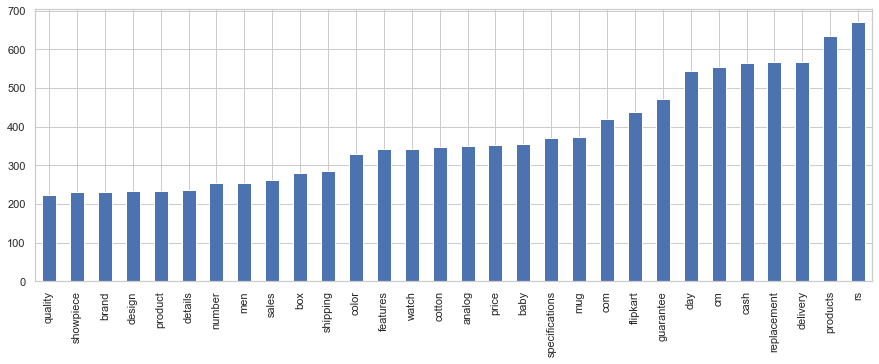

In [67]:
#termes les moins fréquents de la feature "description"
BOW_df.sum(axis=0).sort_values(ascending=True)[-30:].plot.bar(figsize=(15,5))
plt.show()

(1050, 73)


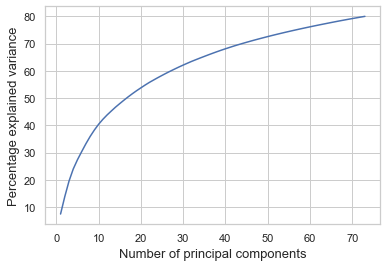

In [68]:
from sklearn.decomposition import PCA
#reduction PCA 80% variance expliquée  
pca = PCA(n_components=0.8, random_state=42)
pca.fit(BOW_df)
x = pca.transform(BOW_df)
print(x.shape)

#scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum())
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.show(block=False)

In [69]:
from sklearn.manifold import TSNE
#reduction TSNE
dict_tsne_results = {}
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(x)
dict_tsne_results['text_BOW']=tsne_results

In [70]:
len(tsne_results)

1050

In [71]:
tsne_results

array([[ 17.856339 , -28.82259  ],
       [ 29.871904 ,  -3.7783577],
       [ 30.07814  ,  -4.995633 ],
       ...,
       [  4.996409 ,  10.411555 ],
       [  6.613806 ,   9.886125 ],
       [  5.2857914,  10.298122 ]], dtype=float32)

In [72]:
#partitionnement
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import MinMaxScaler
kmeans = KMeans(n_clusters=data['category_1'].nunique(), n_init=100, max_iter=400, init='k-means++', random_state=42)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred = {}
dict_y_pred['text_BOW'] = y_pred

In [73]:
y_pred

array([3, 0, 0, ..., 2, 2, 2])

In [74]:
len(y_pred)

1050

In [75]:
y_true =  data['category_1'].values
len(y_true)

1050

In [76]:
y_true

array(['Home Furnishing', 'Baby Care', 'Baby Care', ..., 'Baby Care',
       'Baby Care', 'Baby Care'], dtype=object)

In [77]:
def visualisation(tsne_results, y_pred):    
    # Visualisation 2D de y_pred et y_true
    fig = plt.figure(1, figsize=(20, 8))
    plt.suptitle("visualisation des clusters", fontsize=25, fontweight='bold')

    # Plot 1
    plt.subplot(1, 2, 1)

    X_normalized = MinMaxScaler().fit_transform(tsne_results)
    y_true =  data['category_1'].values

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_true)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_true == digit, 0],
                        X_normalized[y_true == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title("y_true", fontsize=15)

    # Plot 2
    plt.subplot(1, 2, 2)

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_pred)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_pred == digit, 0],
                        X_normalized[y_pred == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title("y_pred", fontsize=15)

    plt.show()

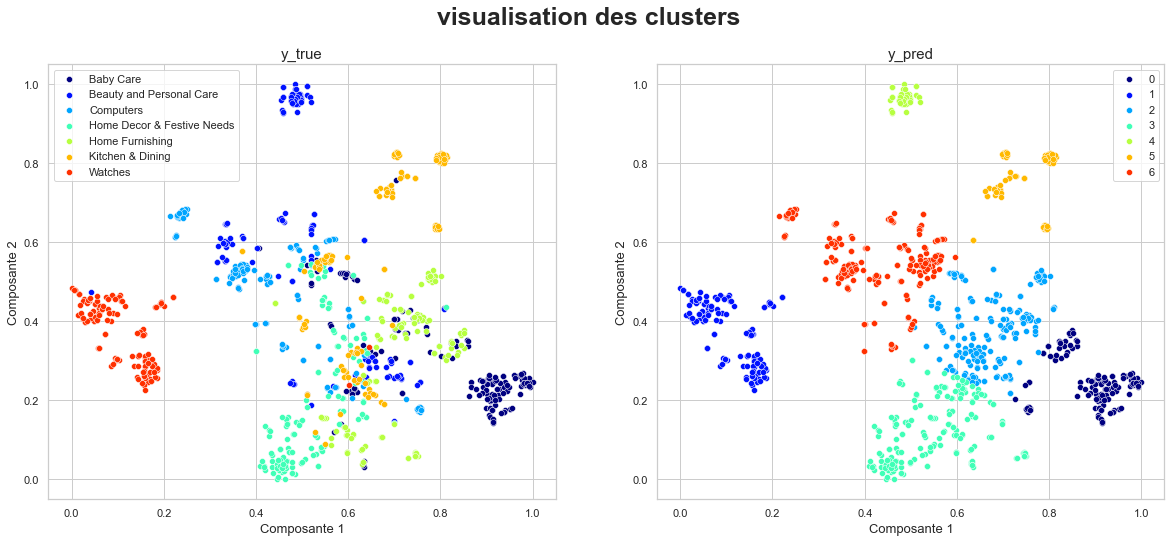

In [78]:
visualisation(tsne_results, y_pred)

In [79]:
from sklearn.metrics.cluster import adjusted_rand_score
result = adjusted_rand_score(data['category_1'], kmeans.labels_)
print('ARI = {}'.format(result))

ARI = 0.36564891856729276


In [80]:
len(y_pred)

1050

### tf-df

In [81]:
#vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer=TfidfVectorizer(max_features=800, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

In [82]:
#dataframe sous forme TF-IDF
TF_IDF_array = tfidfvectorizer.fit_transform(data['description'].astype('U'))
tokens = tfidfvectorizer.get_feature_names()
TF_IDF_df = pd.DataFrame(TF_IDF_array.toarray(), columns=tokens)
print(TF_IDF_df.shape)
TF_IDF_df.head(3)

(1050, 575)


,abstract,ac,accessories,adapter,adapters,addition,age,air,akup,almond,aloevera,aluminium,analog,anti,antique,apparels,appearance,apple,area,aroma,art,artisans,assure,asus,attitude,authentication,baby,bag,band,base,bath,battery,beautifull,beauty,bed,bedroom,bedsheet,belt,birthday,blanket,bleach,blue,body,bodysuit,bottle,bottles,bottom,bowl,box,boy,...,towel,towels,traits,trendnet,trends,tv,type,types,usb,use,utility,vaio,vanity,variety,velvet,vgn,video,vinyl,vitamin,volatege,voltage,volume,wall,wallmantra,walls,wardrobe,warranty,wash,watch,watches,water,waterproof,way,wear,wedding,weight,wheel,width,window,wireless,women,wood,wooden,work,world,wrap,year,years,yes,ym
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.070487,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031243,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.034390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.068215,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.631429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090894,0.0,0.0,0.0,0.0,0.0,0.0,0.049256,0.0,...,0.651846,0.000000,0.0,0.0,0.0,0.0,0.054218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.076247,0.0,0.0,0.070510,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114488,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.056413,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031258,0.0,...,0.590952,0.129322,0.0,0.0,0.0,0.0,0.034407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144532,0.0,0.0,0.041683,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.044746,0.0,0.0,0.0,0.000000,0.0,0.0,0.057682,0.0,0.0


(1050, 123)


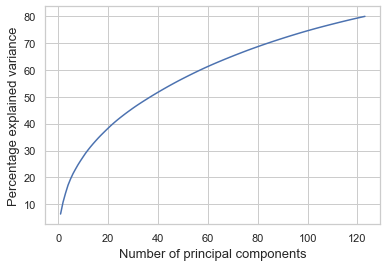

In [83]:
from sklearn.decomposition import PCA
#reduction PCA 80% variance expliquée 
pca = PCA(n_components=0.8, random_state=42)
pca.fit(TF_IDF_df)
x = pca.transform(TF_IDF_df)
print(x.shape)

#scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum())
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.show(block=False)

In [84]:
from sklearn.manifold import TSNE
#réduction TSNE
dict_tsne_results = {}
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(x)
dict_tsne_results['text_TF_IDF']=tsne_results

In [85]:
#partitionnement
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import MinMaxScaler
kmeans = KMeans(n_clusters=data['category_1'].nunique(), n_init=100, max_iter=400, init='k-means++', random_state=42)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred = {}
dict_y_pred['text_TF_IDF'] = y_pred

In [86]:
y_pred

array([3, 5, 5, ..., 0, 0, 0])

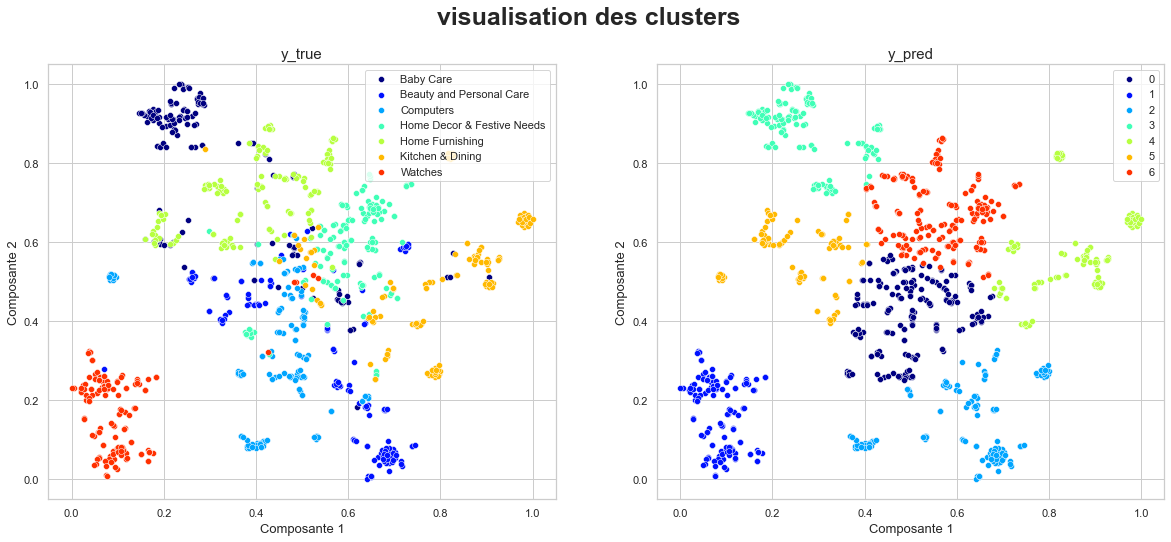

In [87]:
visualisation(tsne_results, y_pred)

In [88]:
from sklearn.metrics.cluster import adjusted_rand_score
result = adjusted_rand_score(data['category_1'], kmeans.labels_)
print('ARI = {}'.format(result))

ARI = 0.3899478808129546


In [89]:
len(y_pred)

1050

# Doc2Vec
- Après moult essais, w2V gere très mal le "out of vocabulary", le "min_count=" est déconseillé =>Doc2Vec

In [90]:
##for doc2vec text embeddings
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts
import gensim.downloader as api
#model_vocab = api.load("glove-twitter-25")
#model_vocab = api.load("word2vec-google-news-300")

##for clustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import utils

##Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
import gensim

def read_corpus(data, column, tokens_only=False):
    
    for i, line in enumerate(data[column]):

        tokens = gensim.parsing.preprocess_string(line)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

C:\Users\tropical noise\AppData\Local\Temp\ipykernel_13180\2573545672.py:10: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  print(len(model.docvecs.vectors))
C:\Users\tropical noise\AppData\Local\Temp\ipykernel_13180\2573545672.py:21: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  tsne_df_results = tsne.fit_transform(model.docvecs.vectors)


1050
[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1050 samples in 0.001s...
[t-SNE] Computed neighbors for 1050 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1050
[t-SNE] Computed conditional probabilities for sample 1050 / 1050
[t-SNE] Mean sigma: 1.217284
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.683235
[t-SNE] KL divergence after 3100 iterations: 0.755719


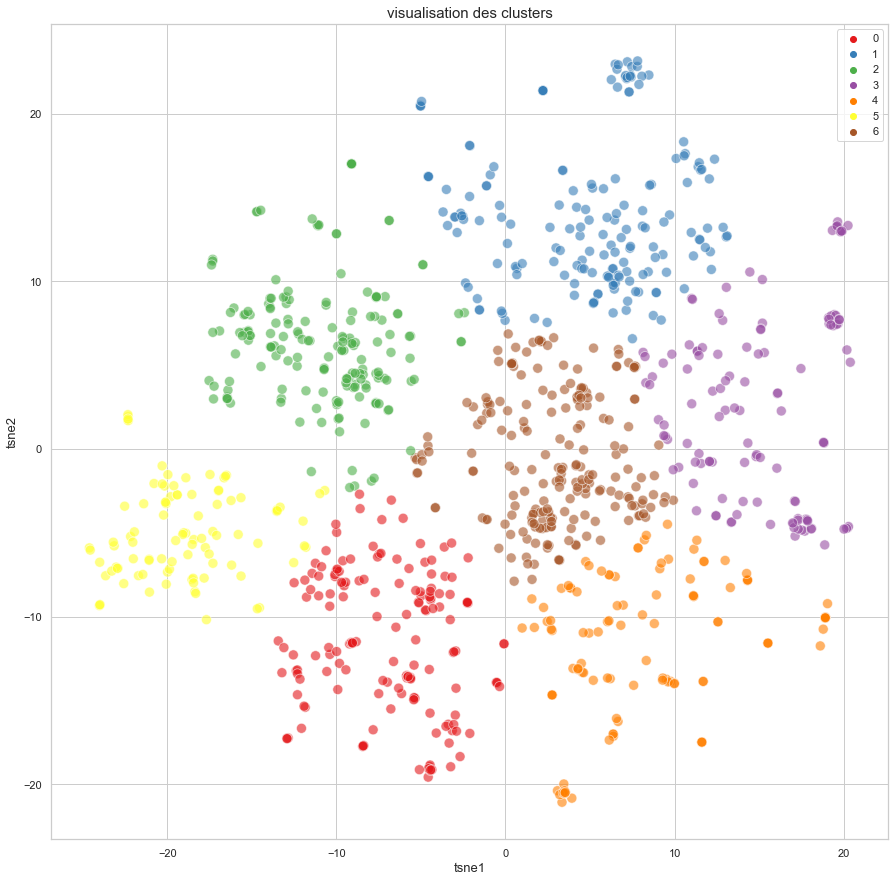

ARI = 0.451


In [92]:
#corpus
description_corpus = (list(read_corpus(data, 'clean_description'))) 

#using distributed memory model
model = gensim.models.doc2vec.Doc2Vec(dm=0, vector_size=300, min_count=5, dm_mean=0, epochs=100, seed=42, workers=8)
model.build_vocab(description_corpus)
#train model
model.train(description_corpus, total_examples=model.corpus_count, epochs=model.epochs)

print(len(model.docvecs.vectors))



#reduction PCA 80% variance expliquée 
#pca = PCA(n_components=0.8, random_state=42)
#pca.fit(model.docvecs.vectors)
#x = pca.transform(model.docvecs.vectors)


tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_df_results = tsne.fit_transform(model.docvecs.vectors)
tsne_df = pd.DataFrame(tsne_df_results, columns=['tsne1', 'tsne2'])


kmeans_tsne_df = KMeans(n_clusters=7, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
labels_tsne_df = kmeans_tsne_df.labels_
clusters_tsne_df = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels_tsne_df})], axis=1)


plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_df.iloc[:,0],clusters_tsne_df.iloc[:,1],hue=labels_tsne_df, palette='Set1', s=100, alpha=0.6).set_title('visualisation des clusters', fontsize=15)
plt.legend()
plt.show()

data['cluster_d'] = labels_tsne_df
categories_true = data['category_1']
categories_predict = data['cluster_d']
from sklearn import metrics
ari_doc2vec_desc = metrics.adjusted_rand_score(categories_true, categories_predict)
print("ARI = %0.3f"
      % metrics.adjusted_rand_score(categories_true, categories_predict))

## BERT

In [93]:
#Modèle 
from transformers import BertTokenizer 
from transformers import BertModel
###############################################
from transformers import AutoTokenizer
from transformers import AutoConfig
from transformers import AutoModel
from sentence_transformers import SentenceTransformer
from sentence_transformers import models

In [94]:
#Modèle
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

#sentences we want to encode
sentences = data.clean_description
#sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

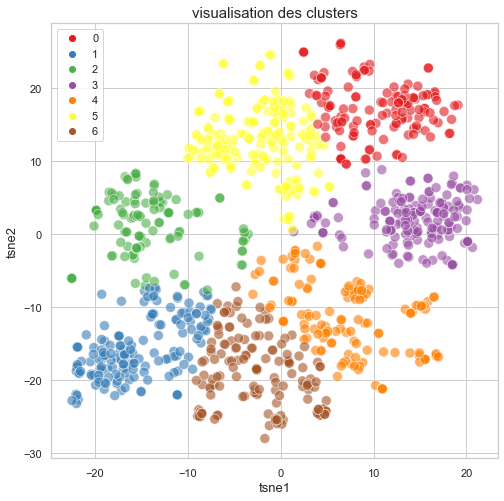

ARI = 0.358


In [95]:
#reduction PCA 80% variance expliquée 
#pca = PCA(n_components=0.8, random_state=42)
#pca.fit(embeddings)
#x = pca.transform(embeddings)


#reduction dimensionnelle TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=5000, learning_rate=200)
tsne_df_results = tsne.fit_transform(embeddings)
tsne_df = pd.DataFrame(tsne_df_results, columns=['tsne1', 'tsne2'])

#partitionnement kmeans
kmeans_tsne_df = KMeans(n_clusters=7, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
labels_tsne_df = kmeans_tsne_df.labels_
clusters_tsne_df = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels_tsne_df})], axis=1)

#plot
plt.figure(figsize = (8,8))
sns.scatterplot(clusters_tsne_df.iloc[:,0],clusters_tsne_df.iloc[:,1],hue=labels_tsne_df, palette='Set1', s=100, alpha=0.6).set_title('visualisation des clusters', fontsize=15)
plt.legend()
plt.show()

#métrique ARI
data['cluster_PN_R'] = labels_tsne_df
categories_true = data['category_1']
categories_predict = data['cluster_PN_R']
from sklearn import metrics
ari_BERT_Roberta_pname = metrics.adjusted_rand_score(categories_true, categories_predict)
print("ARI = %0.3f"
      % metrics.adjusted_rand_score(categories_true, categories_predict))

In [96]:
from sentence_transformers import SentenceTransformer, models
#use BERT for mapping tokens to embeddings
word_embedding_model = models.Transformer('bert-base-uncased')

#apply mean pooling to get one fixed sized sentence vector
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

#sentences we want to encode
sentences = data.clean_description
#sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


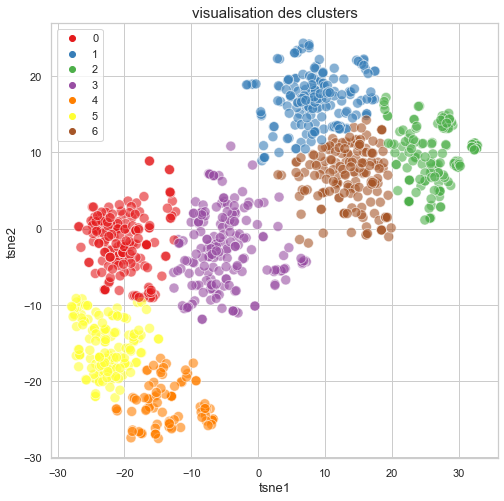

ARI = 0.309


In [97]:
#reduction PCA 80% variance expliquée 
#pca = PCA(n_components=0.8, random_state=42)
#pca.fit(embeddings)
#x = pca.transform(embeddings)

#reduction dimensionnelle TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=5000, learning_rate=200)
tsne_df_results = tsne.fit_transform(embeddings)
tsne_df = pd.DataFrame(tsne_df_results, columns=['tsne1', 'tsne2'])

#partitionnement kmeans
kmeans_tsne_df = KMeans(n_clusters=7, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
labels_tsne_df = kmeans_tsne_df.labels_
clusters_tsne_df = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels_tsne_df})], axis=1)

#plot
plt.figure(figsize = (8,8))
sns.scatterplot(clusters_tsne_df.iloc[:,0],clusters_tsne_df.iloc[:,1],hue=labels_tsne_df, palette='Set1', s=100, alpha=0.6).set_title('visualisation des clusters', fontsize=15)
plt.legend()
plt.show()

#métrique ARI
data['cluster_PN_R'] = labels_tsne_df
categories_true = data['category_1']
categories_predict = data['cluster_PN_R']
from sklearn import metrics
ari_BERT_Roberta_pname = metrics.adjusted_rand_score(categories_true, categories_predict)
print("ARI = %0.3f"
      % metrics.adjusted_rand_score(categories_true, categories_predict))

In [98]:
#BERT for mapping tokens to embeddings
word_embedding_model = models.Transformer('bert-base-cased')

#apply mean pooling to get one fixed sized sentence vector
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

#our sentences we want to encode
sentences = data.clean_description
#sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


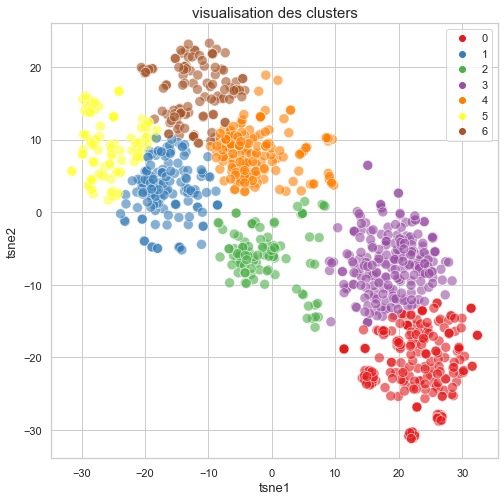

ARI = 0.240


In [99]:
#reduction dimensionnele TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=5000, learning_rate=200)
tsne_df_results = tsne.fit_transform(embeddings)
tsne_df = pd.DataFrame(tsne_df_results, columns=['tsne1', 'tsne2'])

#partitionnement kmeans
kmeans_tsne_df = KMeans(n_clusters=7, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
labels_tsne_df = kmeans_tsne_df.labels_
clusters_tsne_df = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels_tsne_df})], axis=1)

#plot
plt.figure(figsize = (8,8))
sns.scatterplot(clusters_tsne_df.iloc[:,0],clusters_tsne_df.iloc[:,1],hue=labels_tsne_df, palette='Set1', s=100, alpha=0.6).set_title('visualisation des clusters', fontsize=15)
plt.legend()
plt.show()

#métrique ARI
data['cluster_PN_R'] = labels_tsne_df
categories_true = data['category_1']
categories_predict = data['cluster_PN_R']
from sklearn import metrics
ari_BERT_Roberta_pname = metrics.adjusted_rand_score(categories_true, categories_predict)
print("ARI = %0.3f"
      % metrics.adjusted_rand_score(categories_true, categories_predict))

## USE 4

In [1]:
##for USE language model
import tensorflow as tf
import tensorflow_hub as hub

In [101]:
#get the last version of the encoder from google
encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#encode each description
tf_tensor = encoder(df['description'])

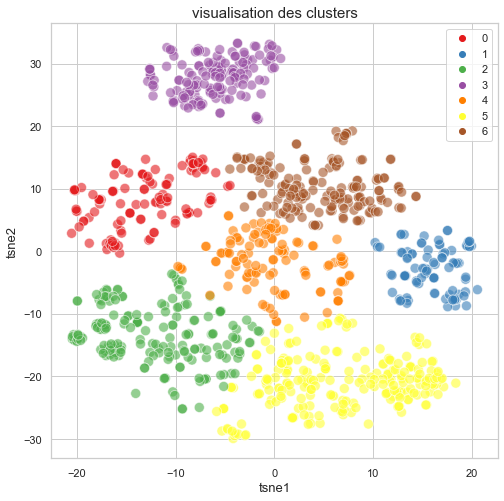

ARI = 0.463


In [102]:
#reduction PCA 80% variance expliquée 
#pca = PCA(n_components=0.8, random_state=42)
#pca.fit(tf_tensor)
#x = pca.transform(tf_tensor)



#reduction dimensionnele TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=80, n_iter=5000, learning_rate=200)
tsne_df_results = tsne.fit_transform(tf_tensor)
tsne_df = pd.DataFrame(tsne_df_results, columns=['tsne1', 'tsne2'])

#partitionnement kmeans
kmeans_tsne_USE = KMeans(n_clusters=7, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df)
labels_tsne_USE = kmeans_tsne_USE.labels_
clusters_tsne_USE = pd.concat([tsne_df, pd.DataFrame({'tsne_clusters':labels_tsne_USE})], axis=1)

#plot
plt.figure(figsize = (8,8))
sns.scatterplot(clusters_tsne_USE.iloc[:,0],clusters_tsne_USE.iloc[:,1],hue=labels_tsne_USE, palette='Set1', s=100, alpha=0.6).set_title('visualisation des clusters', fontsize=15)
plt.legend()
plt.show()

#métrique ARI
data['cluster_USE_D'] = labels_tsne_USE
categories_true = data['category_1']
categories_predict = data['cluster_USE_D']
ari_USE_desc = metrics.adjusted_rand_score(categories_true, categories_predict)
print("ARI = %0.3f"
      % metrics.adjusted_rand_score(categories_true, categories_predict))